 <div style="text-align: center ">Hands on : Social Network Analytics </div>

<div style="text-align: center ">                        Class Tutorial Part 3  </div>
 <div style="text-align: center "> Network Analysis and Mining  (Elective 6: 6th Semester CSE, 2023) </div>
 
  <div style="text-align: center "> Material for unit 2 and unit 3 </div>
  
 <div style="text-align: center "> Bhaskarjyoti Das </div>
<div style="text-align: center "> PES University </div>

<div style="text-align: center "> Disclaimer : The material is borrowed, adapted, modified and further developed using various tutorials at Networkx sites and elsewhere </div>



In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.6.3


# Components, cliques, k-cores, and k-components



In [2]:
import networkx as nx

## Disjoint union, connected components

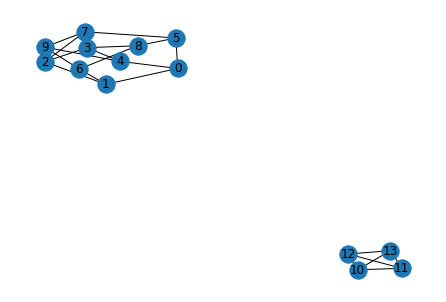

In [3]:
#let us first make the graph 
G = nx.disjoint_union(nx.petersen_graph(), nx.tetrahedral_graph())
nx.draw(G, with_labels=True)

The function **nx.connected_components** yields sets of nodes that form the components of the graph. 

 

In [4]:
list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}]

##  How to select the largest connected component of a graph?

In [5]:
largest = max(nx.connected_components(G), key=len)
len(largest)

10

For directed graphs we have to distinguish between weakly and strongly connected components:

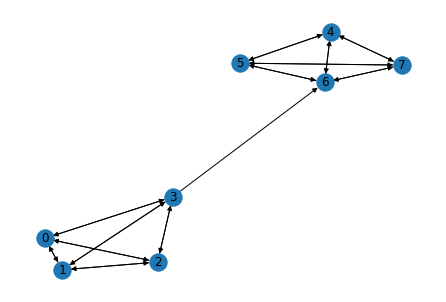

In [6]:
D = nx.disjoint_union(
    nx.tetrahedral_graph(create_using=nx.DiGraph()),
    nx.tetrahedral_graph(create_using=nx.DiGraph())
)
D.add_edge(3, 6)
nx.draw(D, with_labels=True)

In [7]:
list(nx.weakly_connected_components(D))

[{0, 1, 2, 3, 4, 5, 6, 7}]

In [8]:
list(nx.strongly_connected_components(D))

[{4, 5, 6, 7}, {0, 1, 2, 3}]

##  Cliques
A **complete graph** is a graph in which all possible edges are present, so its density is 1. A **clique** is an induced subgraph $G[U]$ formed by a subset of nodes $U \subseteq V(G)$ if, and only if, the induced subgraph $G[U]$ is a complete graph. Thus, there is an edge that links each pair of nodes in a clique.

By convention dyads are considered cliques but they are not very interesting so it's safe to filter them out.

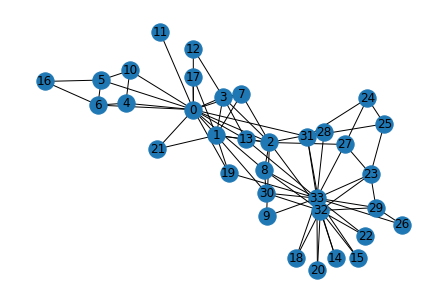

In [9]:
K = nx.karate_club_graph()
nx.draw(K, with_labels=True)

In [10]:
cliques = list(nx.find_cliques(K))
[clique for clique in cliques if len(clique) > 2]

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 12, 3],
 [2, 32, 8],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31]]

In [11]:
clique = K.subgraph([0, 1, 2, 3, 13])
nx.density(clique)

1.0

##  K-cores
A $k$-core of $G$ is a maximal subgraph in which all nodes have degree greater or equal than $k$; which means that a $k$-core is a maximal subgraph with the property $\delta \ge k$. The **core number** of a node is the largest value $k$ of a $k$-core containing that node.

In [12]:
nx.core_number(K)

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 3,
 5: 3,
 6: 3,
 7: 4,
 8: 4,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 4,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 3,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

We can obtain the subgraph that forms a k-core using the function **nx.kcore**

In [13]:
C3 = nx.k_core(K, 3)

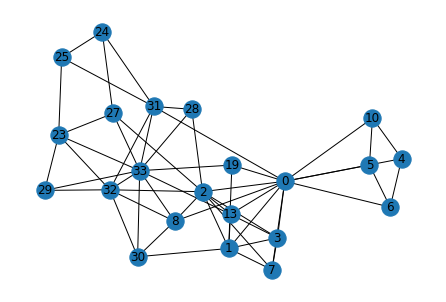

In [14]:
nx.draw(C3, with_labels=True)

Note that k-cores, even though all nodes have degree at least k, do not have the connectivity properties of k-components. In this example the 3-core can be disconnected by removing only one node: 0.

In [15]:
nx.node_connectivity(C3)

1

## Finding K Core 

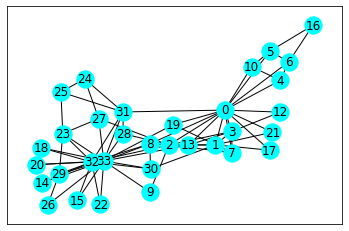

In [16]:
g_core=nx.k_core(K, k=2, core_number=None)
nx.draw_networkx(g_core,node_color='cyan')

## Find all cliques ( small graph)

In [17]:
list(nx.find_cliques(G))

[[0, 1],
 [0, 4],
 [0, 5],
 [2, 1],
 [2, 3],
 [2, 7],
 [3, 8],
 [3, 4],
 [6, 8],
 [6, 1],
 [6, 9],
 [7, 9],
 [7, 5],
 [8, 5],
 [9, 4],
 [10, 11, 12, 13]]

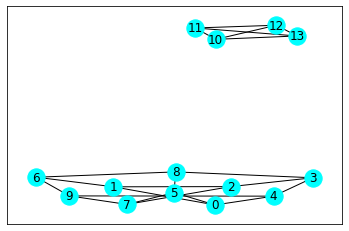

In [18]:
g_core=nx.k_core(G, k=2, core_number=None)
nx.draw_networkx(g_core,node_color='cyan')

In [19]:
k_components = nx.k_components(G)
k_components

{3: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}],
 2: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}],
 1: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13}]}

#  Finding Similarity between nodes

In [20]:
G=nx.karate_club_graph()


In [21]:
preds = nx.jaccard_coefficient(G)
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 32) -> 0.12000000
(0, 33) -> 0.13793103
(0, 9) -> 0.05882353
(0, 14) -> 0.00000000
(0, 15) -> 0.00000000
(0, 16) -> 0.12500000
(0, 18) -> 0.00000000
(0, 20) -> 0.00000000
(0, 22) -> 0.00000000
(0, 23) -> 0.00000000
(0, 24) -> 0.05555556
(0, 25) -> 0.05555556
(0, 26) -> 0.00000000
(0, 27) -> 0.05263158
(0, 28) -> 0.11764706
(0, 29) -> 0.00000000
(0, 30) -> 0.11111111
(1, 4) -> 0.09090909
(1, 5) -> 0.08333333
(1, 6) -> 0.08333333
(1, 8) -> 0.27272727
(1, 9) -> 0.10000000
(1, 10) -> 0.09090909
(1, 11) -> 0.11111111
(1, 12) -> 0.22222222
(1, 14) -> 0.00000000
(1, 15) -> 0.00000000
(1, 16) -> 0.00000000
(1, 18) -> 0.00000000
(1, 20) -> 0.00000000
(1, 22) -> 0.00000000
(1, 23) -> 0.00000000
(1, 24) -> 0.00000000
(1, 25) -> 0.00000000
(1, 26) -> 0.00000000
(1, 27) -> 0.08333333
(1, 28) -> 0.09090909
(1, 29) -> 0.00000000
(1, 31) -> 0.07142857
(1, 32) -> 0.10526316
(1, 33) -> 0.13043478
(2, 4) -> 0.08333333
(2, 5) -> 0.07692308
(2, 6) -> 0.07692308
(2, 10) -> 0.08333333
(2, 11) -> 0.100000

In [22]:
preds = nx.adamic_adar_index(G)
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 32) -> 1.61374004
(0, 33) -> 2.71101972
(0, 9) -> 0.43429448
(0, 14) -> 0.00000000
(0, 15) -> 0.00000000
(0, 16) -> 1.44269504
(0, 18) -> 0.00000000
(0, 20) -> 0.00000000
(0, 22) -> 0.00000000
(0, 23) -> 0.00000000
(0, 24) -> 0.55811063
(0, 25) -> 0.55811063
(0, 26) -> 0.00000000
(0, 27) -> 0.43429448
(0, 28) -> 0.99240511
(0, 29) -> 0.00000000
(0, 30) -> 1.07645455
(1, 4) -> 0.36067376
(1, 5) -> 0.36067376
(1, 6) -> 0.36067376
(1, 8) -> 1.51631576
(1, 9) -> 0.43429448
(1, 10) -> 0.36067376
(1, 11) -> 0.36067376
(1, 12) -> 0.91878439
(1, 14) -> 0.00000000
(1, 15) -> 0.00000000
(1, 16) -> 0.00000000
(1, 18) -> 0.00000000
(1, 20) -> 0.00000000
(1, 22) -> 0.00000000
(1, 23) -> 0.00000000
(1, 24) -> 0.00000000
(1, 25) -> 0.00000000
(1, 26) -> 0.00000000
(1, 27) -> 0.43429448
(1, 28) -> 0.43429448
(1, 29) -> 0.00000000
(1, 31) -> 0.36067376
(1, 32) -> 1.15564200
(1, 33) -> 2.25292168
(2, 4) -> 0.36067376
(2, 5) -> 0.36067376
(2, 6) -> 0.36067376
(2, 10) -> 0.36067376
(2, 11) -> 0.360673

In [23]:
preds = nx.preferential_attachment(G)
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(0, 32) -> 192.00000000
(0, 33) -> 272.00000000
(0, 9) -> 32.00000000
(0, 14) -> 32.00000000
(0, 15) -> 32.00000000
(0, 16) -> 32.00000000
(0, 18) -> 32.00000000
(0, 20) -> 32.00000000
(0, 22) -> 32.00000000
(0, 23) -> 80.00000000
(0, 24) -> 48.00000000
(0, 25) -> 48.00000000
(0, 26) -> 32.00000000
(0, 27) -> 64.00000000
(0, 28) -> 48.00000000
(0, 29) -> 64.00000000
(0, 30) -> 64.00000000
(1, 4) -> 27.00000000
(1, 5) -> 36.00000000
(1, 6) -> 36.00000000
(1, 8) -> 45.00000000
(1, 9) -> 18.00000000
(1, 10) -> 27.00000000
(1, 11) -> 9.00000000
(1, 12) -> 18.00000000
(1, 14) -> 18.00000000
(1, 15) -> 18.00000000
(1, 16) -> 18.00000000
(1, 18) -> 18.00000000
(1, 20) -> 18.00000000
(1, 22) -> 18.00000000
(1, 23) -> 45.00000000
(1, 24) -> 27.00000000
(1, 25) -> 27.00000000
(1, 26) -> 18.00000000
(1, 27) -> 36.00000000
(1, 28) -> 27.00000000
(1, 29) -> 36.00000000
(1, 31) -> 54.00000000
(1, 32) -> 108.00000000
(1, 33) -> 153.00000000
(2, 4) -> 30.00000000
(2, 5) -> 40.00000000
(2, 6) -> 40.000

In [24]:
## Degree Assortativity 
# Assortativity measures the similarity of connections in the graph with respect to the node degree.
r=nx.degree_assortativity_coefficient(G)
print("%3.1f"%r)

-0.5


In [25]:
diameter = (nx.diameter(G))
print(diameter)

5


#  Clustering Coefficient 

WE need to do this for undirected graph

In [26]:
print(nx.transitivity(G))

0.2556818181818182


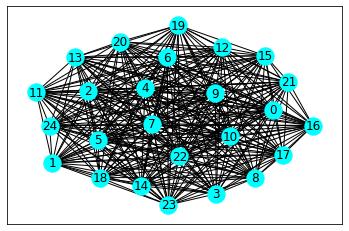

In [27]:
CC = nx.complete_graph(25)  #synthetic graph
nx.draw_networkx(CC,node_color='cyan')

In [28]:
print(nx.clustering(CC))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0}


## Compute the average_clustering(CC)  

In [29]:
print(nx.average_clustering(CC))

1.0


Do the same for synthetically generated graph

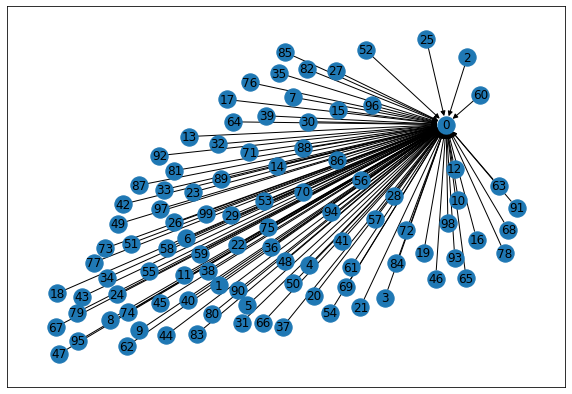

In [30]:
# draw a gnr-graph, which is like a facebook or twitter
plt.figure(figsize=(10,7))
gnr = nx.gnr_graph(100,1,create_using=nx.DiGraph())
nx.draw_networkx(gnr)

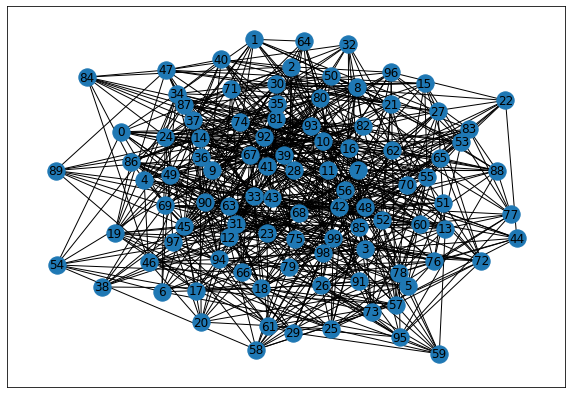

In [31]:
er = nx.erdos_renyi_graph(100, 0.15)
plt.figure(figsize=(10,7))
nx.draw_networkx(er)

In [32]:
print(nx.average_clustering(er))

0.14974951123867522


# Community Detection 

## Louvain Method : community Detection 

In [33]:
import community  # You need to instal this separate this

#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(30, 0.05)
#better with karate_graph() as defined in networkx example.
G=nx.karate_club_graph()

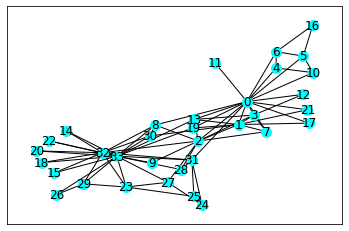

In [34]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [35]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [9]]

In [36]:
#first compute the best partition
part = community.best_partition(G)
print(part)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 1, 8: 0, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 2, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 3, 24: 3, 25: 3, 26: 0, 27: 3, 28: 3, 29: 0, 30: 0, 31: 3, 32: 0, 33: 0}


In [37]:
print(community.modularity(part, G))

0.4188034188034188


In [38]:
induced = community.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[1, 2, 0, 3]
[(1, 1), (1, 2), (1, 0), (1, 3), (2, 2), (0, 0), (0, 3), (3, 3)]


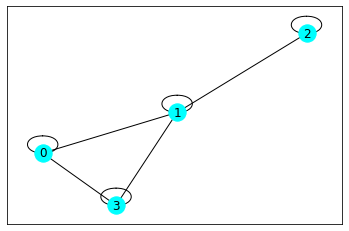

In [39]:
nx.draw_networkx(induced,node_color='cyan')

In [40]:
## Community using Clique percolation 

In [41]:
G=nx.karate_club_graph()


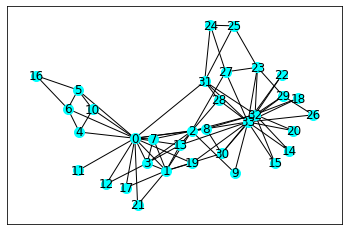

In [42]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [43]:
list(nx.find_cliques(G))  # Search for all maximal cliques in a graph.

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [44]:
synthetic = nx.make_max_clique_graph(G)  
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph. 
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 28), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 29), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 18), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 18), (8, 9), (8, 10), (8, 11), (8, 12), (8, 18), (9, 10), (9, 11), (9, 12), (9, 14), (9, 15), (9, 16), (9, 17), (9, 19), (10, 11), (10, 12), (11, 12), (12, 26), (12, 32), (12, 33), (13, 19), (14, 15), (14, 16), (14, 17), (14, 19), (14, 20), (14, 21), (14, 22), (14, 23), (14, 24), (1

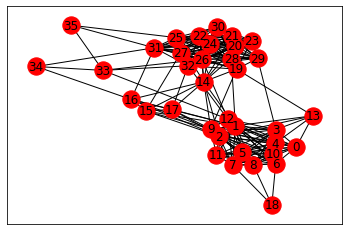

In [45]:
nx.draw_networkx(synthetic,node_color='red')

## Find k-clique communities in graph using the percolation method.

A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.

In [46]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({0, 1, 2, 3, 7, 13}), frozenset({32, 33, 8, 30}), frozenset({32, 33, 29, 23})]


A frozenset is an immutable version of a Python set. Because of its
immutability, it can be used as key in a dictionary, but it can be
cast to a set, if any modifications are necessary.


In [47]:
print(len(list(c)))


3


In [48]:
print(list(c[0]))
print(list(c[1]))
print(list(c[2]))

[0, 1, 2, 3, 7, 13]
[32, 33, 8, 30]
[32, 33, 29, 23]


# Random Graph Generators
These are graph data simulators that we will study in syllabus

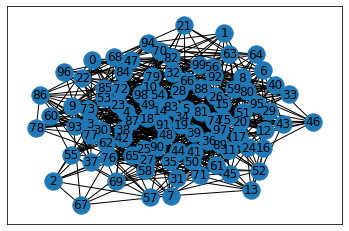

In [49]:
# random graphs
D = nx.erdos_renyi_graph(100, 0.15)
nx.draw_networkx(D)

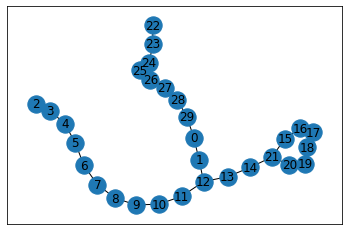

In [50]:
D = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw_networkx(D)

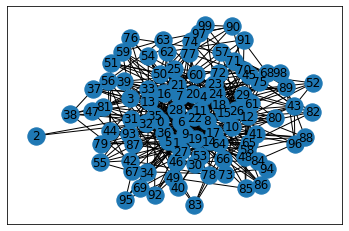

In [51]:
D = nx.barabasi_albert_graph(100, 5)
nx.draw_networkx(D)